In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/expresso-churn-prediction-challenge/SampleSubmission.csv
/kaggle/input/expresso-churn-prediction-challenge/Train.csv
/kaggle/input/expresso-churn-prediction-challenge/Test.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import os

In [6]:
train_path = ""
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if filename.lower().startswith("train") and filename.endswith(".csv"):
            train_path = os.path.join(dirname, filename)

In [7]:
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


df = pd.read_csv("/kaggle/input/expresso-churn-prediction-challenge/Train.csv")

/kaggle/input/expresso-churn-prediction-challenge/SampleSubmission.csv
/kaggle/input/expresso-churn-prediction-challenge/Train.csv
/kaggle/input/expresso-churn-prediction-challenge/Test.csv


Data exploration
-

In [8]:
df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [9]:
df.shape;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


Missing data
-

In [10]:
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

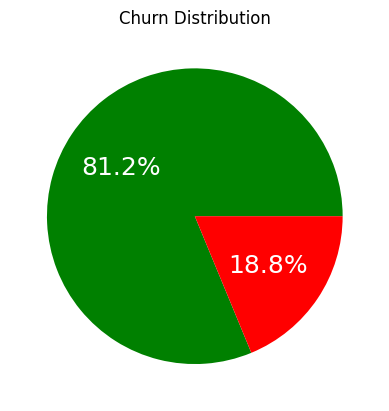

CHURN
0    1750062
1     403986
Name: count, dtype: int64


In [11]:
plt.pie(df['CHURN'].value_counts() , labels = df['CHURN'].value_counts().index ,autopct = '%1.1f%%',colors=['green','red'],textprops={'color': 'white', 'fontsize': 18})
plt.title("Churn Distribution")
plt.show()

print(df['CHURN'].value_counts())

In [12]:
print(df.describe(include='all'))

                                         user_id   REGION        TENURE  \
count                                    2154048  1304749       2154048   
unique                                   2154048       14             8   
top     00000bfd7d50f01092811bc0c8d7b0d6fe7c3596    DAKAR  K > 24 month   
freq                                           1   513271       2043201   
mean                                         NaN      NaN           NaN   
std                                          NaN      NaN           NaN   
min                                          NaN      NaN           NaN   
25%                                          NaN      NaN           NaN   
50%                                          NaN      NaN           NaN   
75%                                          NaN      NaN           NaN   
max                                          NaN      NaN           NaN   

             MONTANT  FREQUENCE_RECH       REVENUE  ARPU_SEGMENT  \
count   1.397309e+06    1.39730

Skewness and kurrtosis
-

Skewness:
MONTANT            4.229726
FREQUENCE_RECH     2.111988
REVENUE            4.189002
ARPU_SEGMENT       4.189019
FREQUENCE          1.775081
DATA_VOLUME       36.256743
ON_NET             8.147928
ORANGE             8.054016
TIGO              12.899932
ZONE1             25.708893
ZONE2             30.885189
REGULARITY         0.247408
FREQ_TOP_PACK      4.112066
CHURN              1.600885
dtype: float64

Kurtosis:
MONTANT             57.528484
FREQUENCE_RECH       5.316956
REVENUE             64.821825
ARPU_SEGMENT        64.822078
FREQUENCE            3.402515
DATA_VOLUME       2448.124083
ON_NET             116.857121
ORANGE             189.038713
TIGO               334.674716
ZONE1             1572.688920
ZONE2             2107.054856
REGULARITY          -1.487170
FREQ_TOP_PACK       61.726468
CHURN                0.562832
dtype: float64


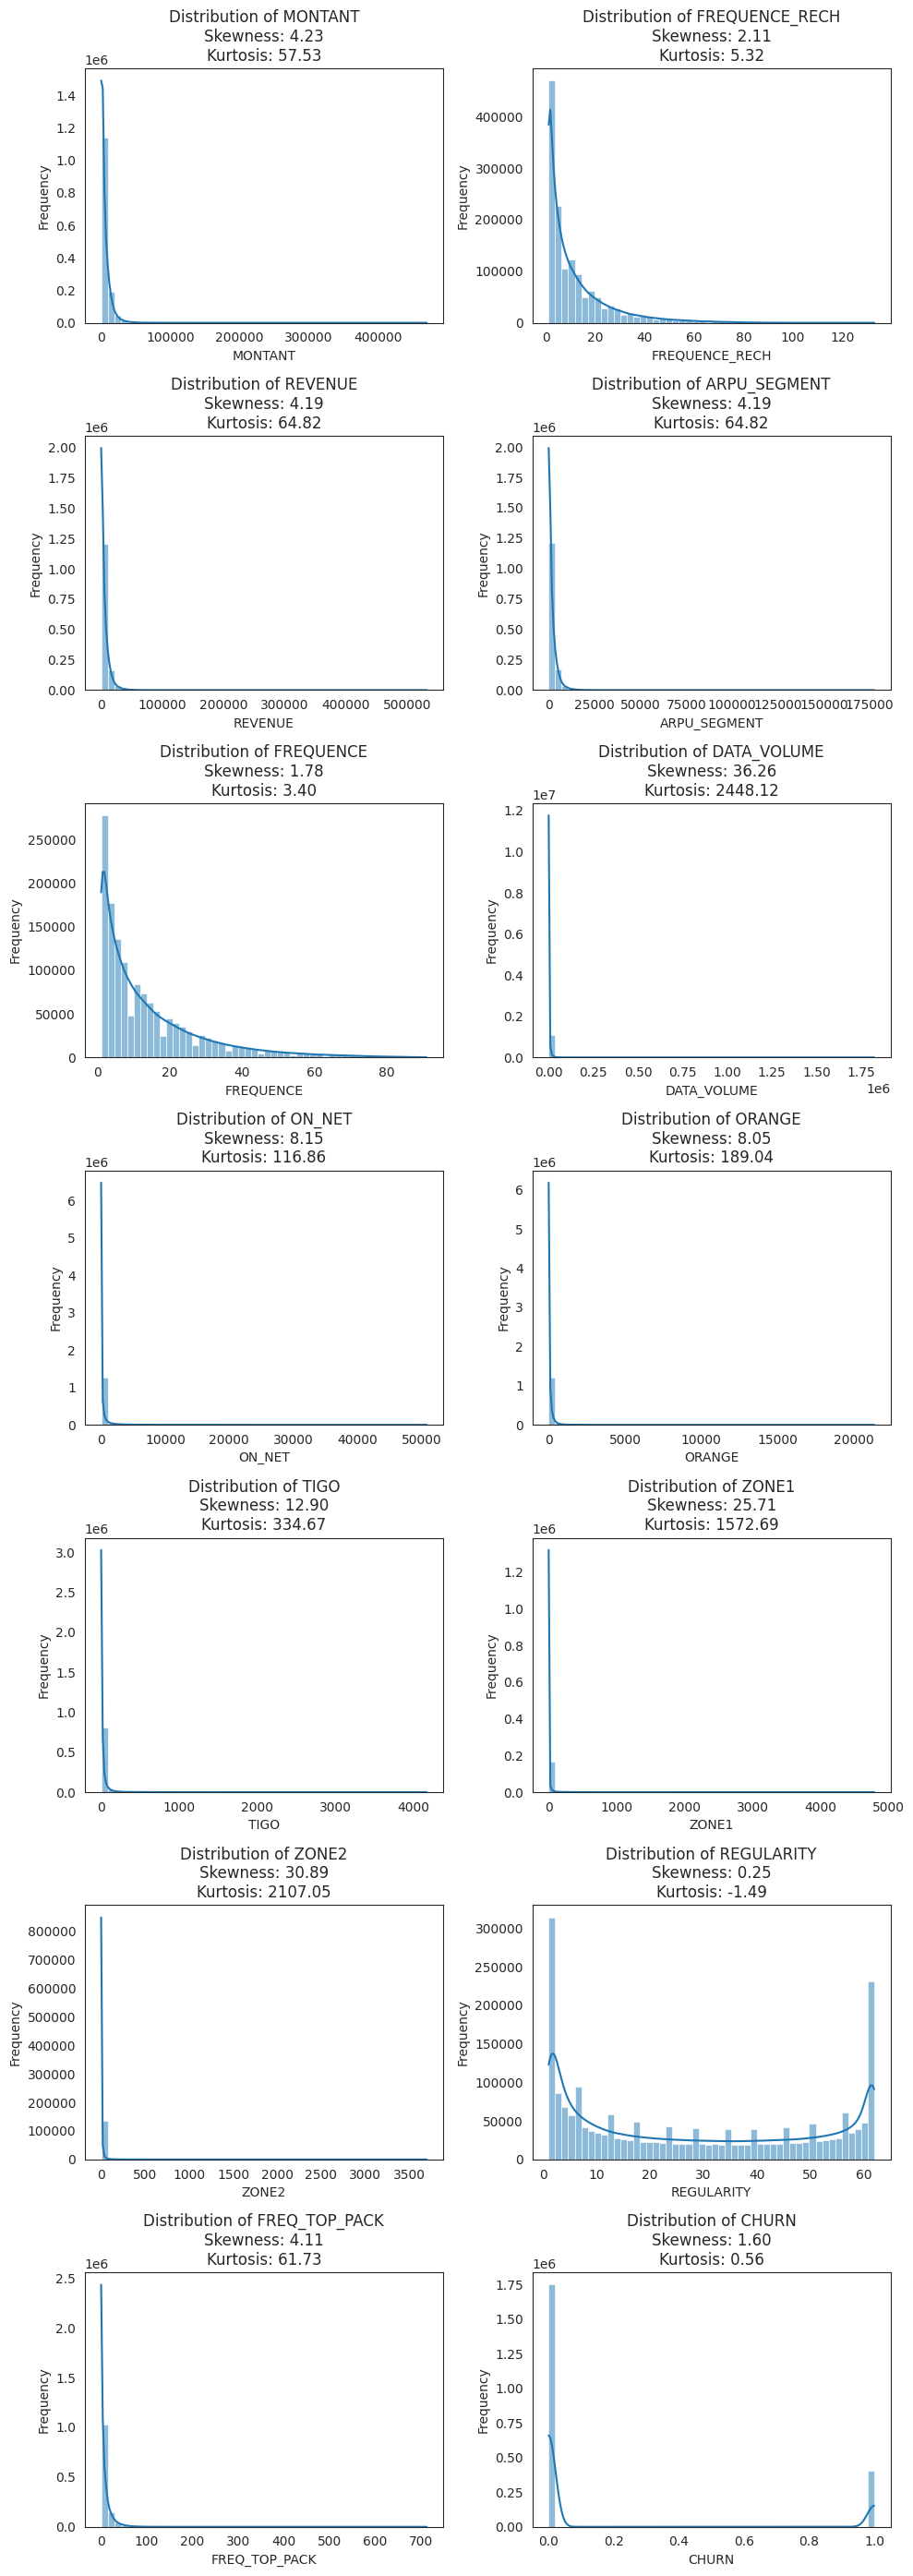

In [13]:
numerical_cols = df.select_dtypes(include=['number']).columns
print("Skewness:")
print(df[numerical_cols].skew())
print("\nKurtosis:")
print(df[numerical_cols].kurtosis())
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
sns.set_style("white")
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {col}\nSkewness: {df[col].skew():.2f}\nKurtosis: {df[col].kurtosis():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Fix for hiding extra subplots if any
for j in range(len(numerical_cols), n_rows * n_cols):
    if j < len(plt.gcf().axes):
        plt.gcf().axes[j].axis('off')

plt.tight_layout()
plt.show()

Distribution analysis
-

In [14]:
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, f_oneway, kruskal
from statsmodels.graphics.gofplots import qqplot
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

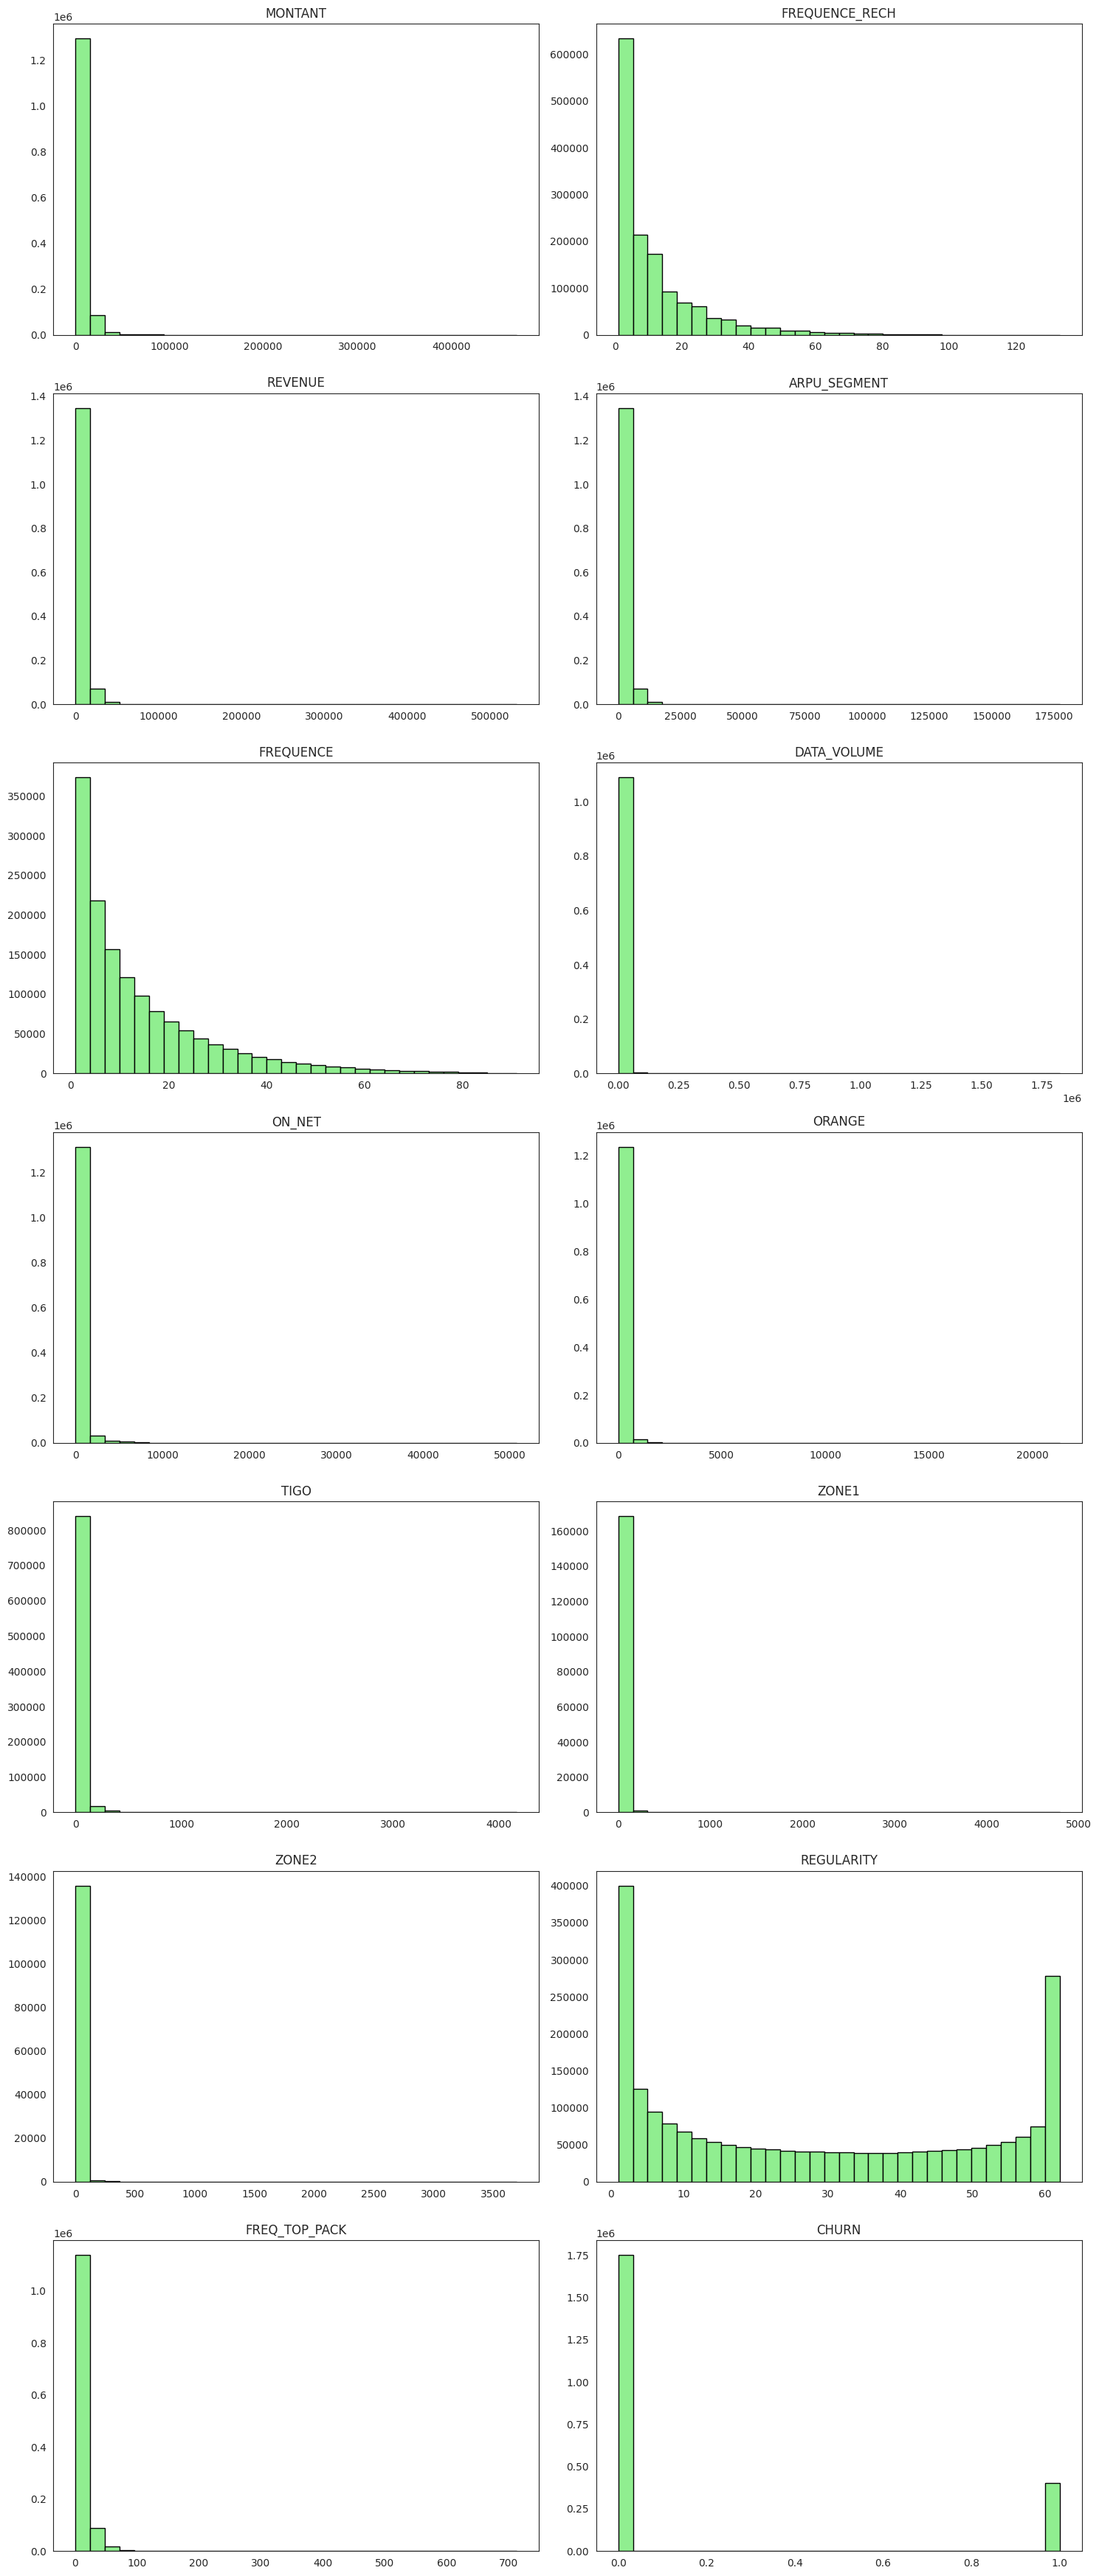

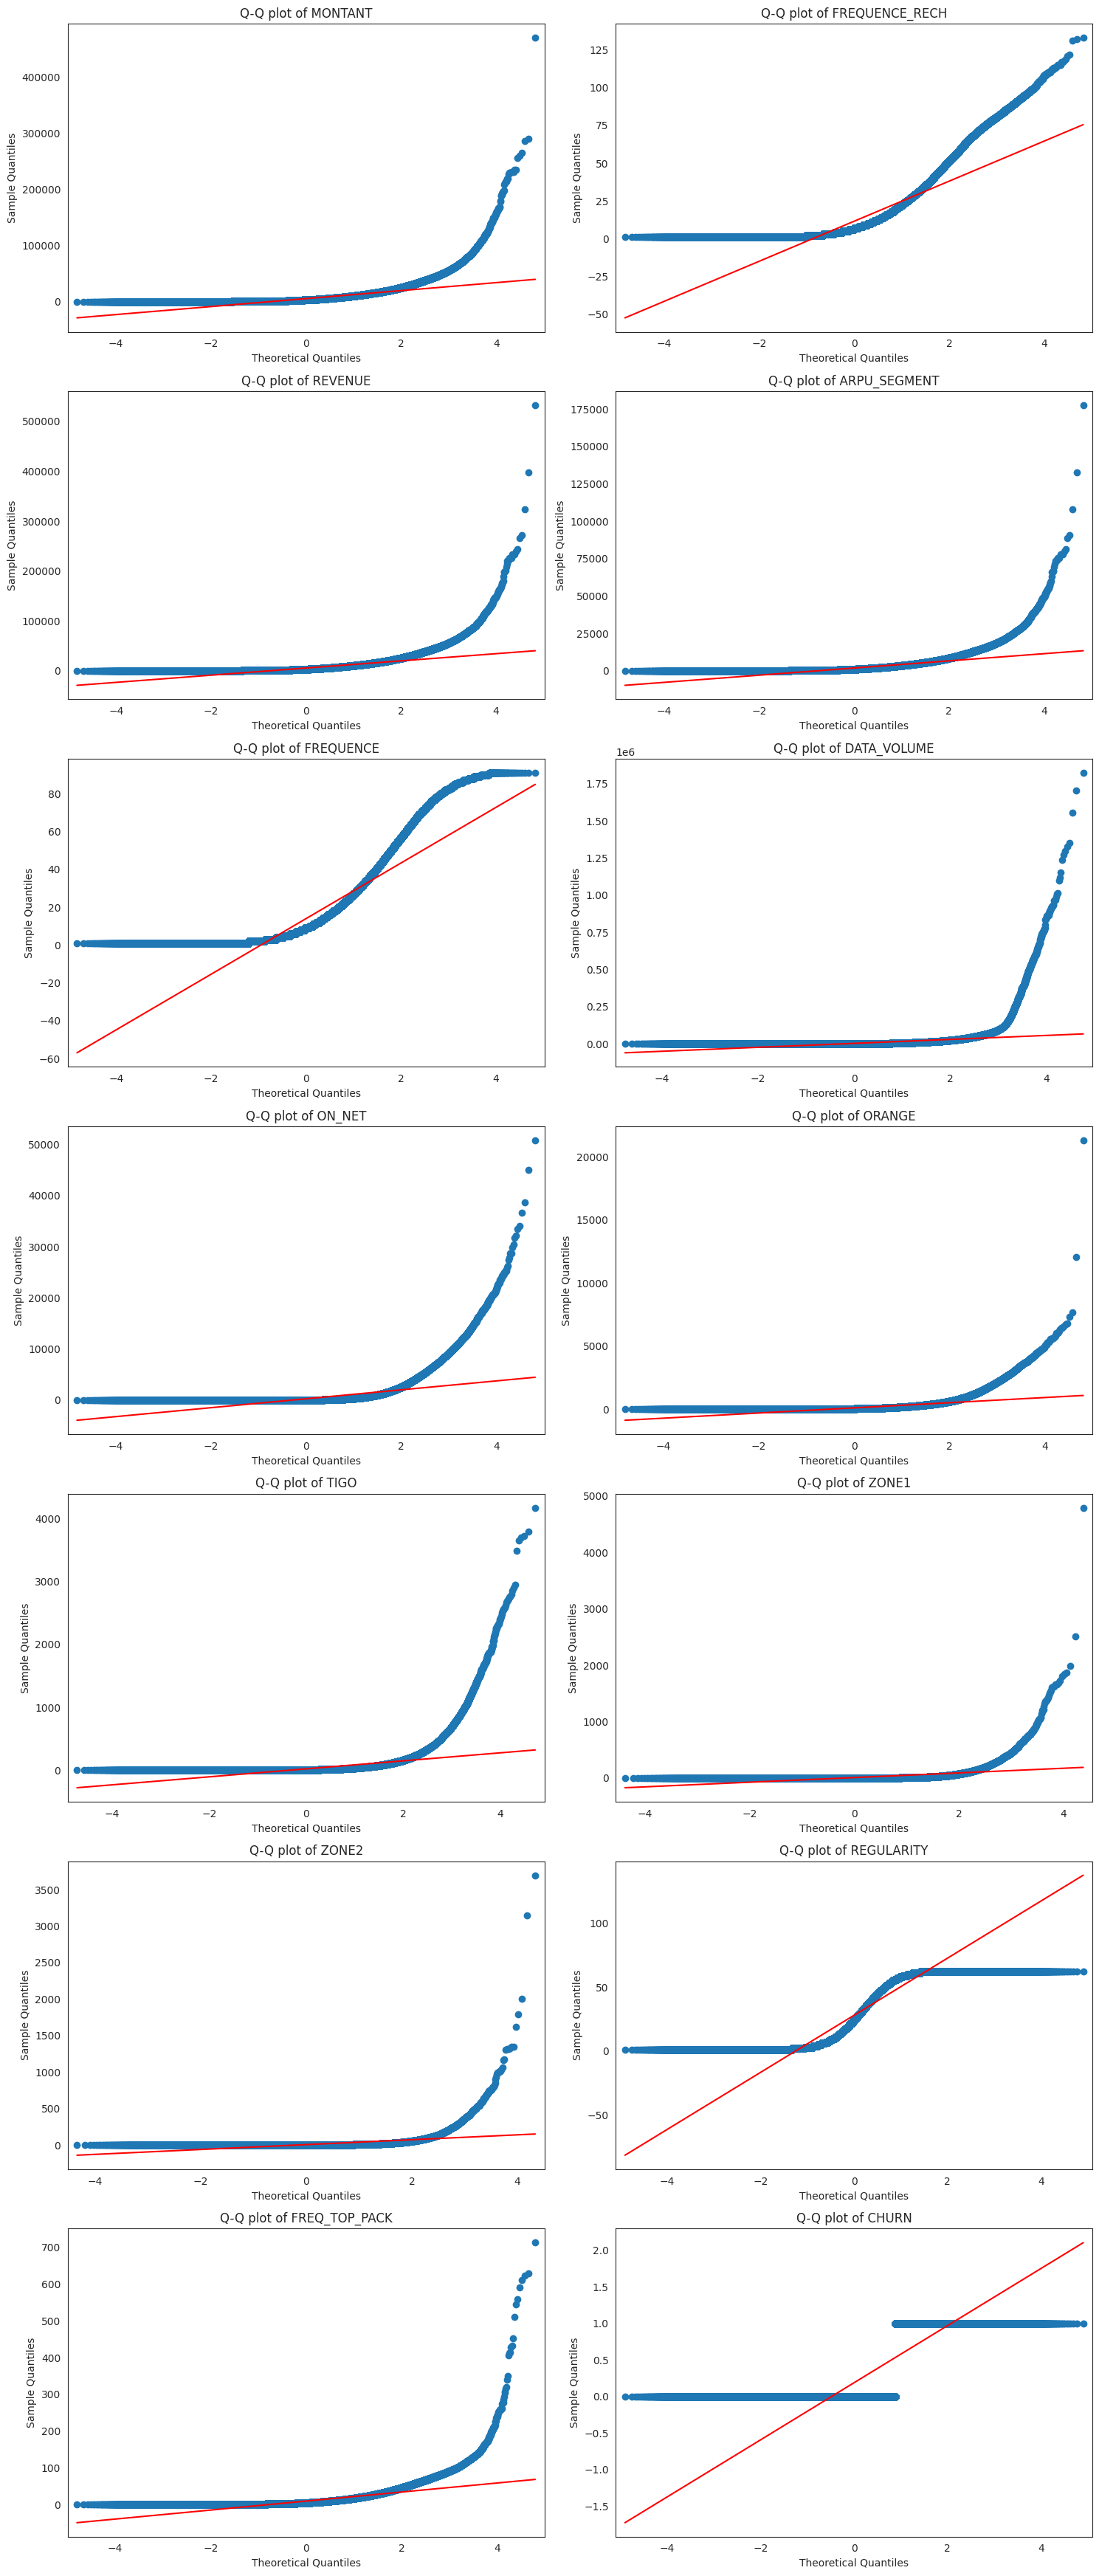

In [15]:
df["CHURN"] = df["CHURN"].astype(int)
df["REGION"] = df["REGION"].astype(str).str.lower()
df["TOP_PACK"] = df["TOP_PACK"].astype(str)

numeric_cols = [
    "MONTANT", "FREQUENCE_RECH", "REVENUE", "ARPU_SEGMENT",
    "FREQUENCE", "DATA_VOLUME", "ON_NET", "ORANGE", "TIGO",
    "ZONE1", "ZONE2", "REGULARITY", "FREQ_TOP_PACK"
]
cat_cols = ["REGION", "TENURE", "TOP_PACK"]
numerical_cols = df.select_dtypes(include=np.number).columns
n_cols = 2 
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
df.hist(
    column=numerical_cols, 
    figsize=(15, n_rows * 5),
    bins=30,
    color="lightgreen", 
    layout=(n_rows, n_cols), 
    grid=False,
    edgecolor='black'
)

plt.tight_layout()
plt.show()


# Q-Q plot
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    qqplot(
        df[col].dropna(),
        line="s",
        ax=ax
    )
    ax.set_title(f"Q-Q plot of {col}")

# Ẩn các ô dư nếu số biến không chia hết cho n_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Correlation analysis
-

In [20]:
numerical_cols = [
    "MONTANT",
    "FREQUENCE_RECH",
    "REVENUE",
    "ARPU_SEGMENT",
    "FREQUENCE",
    "DATA_VOLUME",
    "ON_NET",
    "ORANGE",
    "TIGO",
    "ZONE1",
    "ZONE2",
    "REGULARITY",
    "FREQ_TOP_PACK"
]

Hypothesis testing
-

In [26]:
# T-test REGULARITY between CHURN=0 and CHURN=1
reg0 = df[df["CHURN"] == 0]["REGULARITY"].dropna()
reg1 = df[df["CHURN"] == 1]["REGULARITY"].dropna()
t_stat, p_val = ttest_ind(reg0, reg1, equal_var=False)
print(f"T-test REGULARITY between CHURN=0 and 1: p-value = {p_val:.4g}")

# ANOVA REVENUE by TENURE (full data)
anova_groups = [grp["REVENUE"].dropna() for name, grp in df.groupby("TENURE")]
f_stat, p_val = f_oneway(*anova_groups)
print(f"ANOVA REVENUE across TENURE: p-value = {p_val:.4g}")

# Non-parametric Kruskal-Wallis for REVENUE by TENURE
h_stat, p_val = kruskal(*anova_groups)
print(f"Kruskal-Wallis REVENUE across TENURE: p-value = {p_val:.4g}")

# Chi-square
for col in cat_cols:
    ct = pd.crosstab(df[col], df["CHURN"])
    chi2, p, dof, exp = chi2_contingency(ct)
    print(f"Chi-square test {col} vs CHURN: p-value = {p:.4g}")

T-test REGULARITY between CHURN=0 and 1: p-value = 0
ANOVA REVENUE across TENURE: p-value = 2.475e-87
Kruskal-Wallis REVENUE across TENURE: p-value = 8.784e-103
Chi-square test REGION vs CHURN: p-value = 0
Chi-square test TENURE vs CHURN: p-value = 0
Chi-square test TOP_PACK vs CHURN: p-value = 0


Exploratory data
-

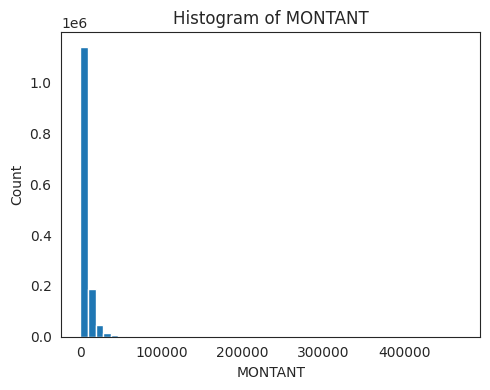

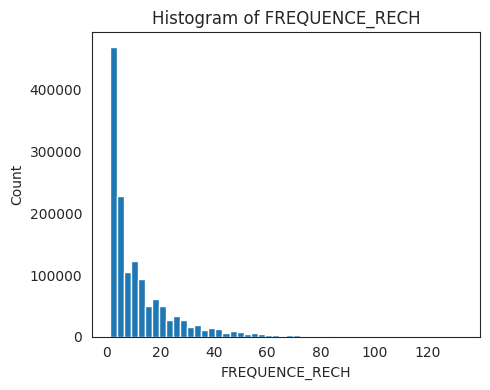

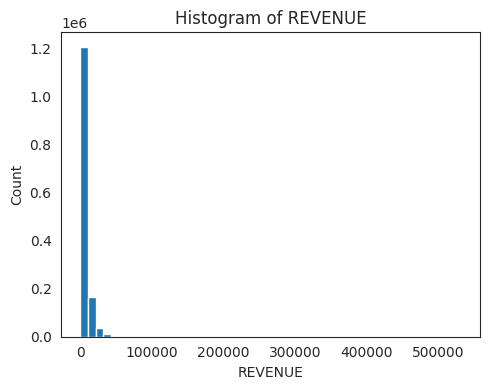

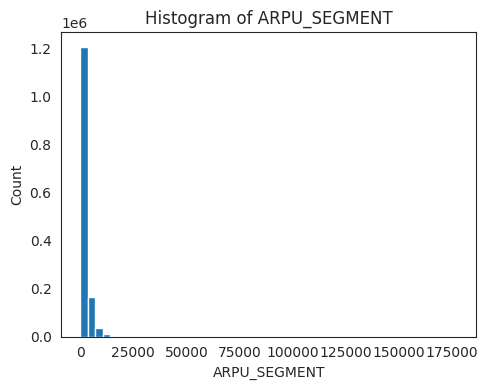

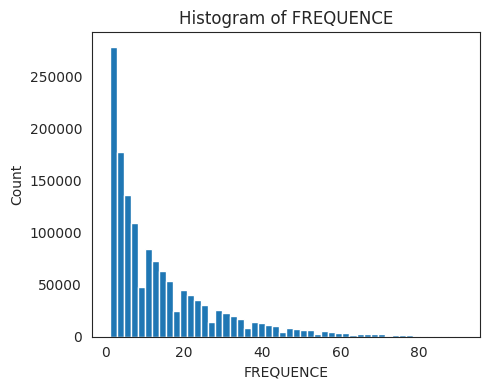

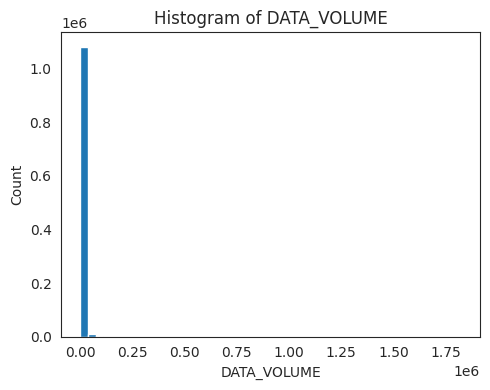

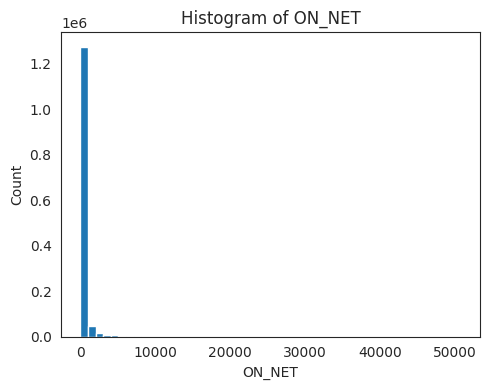

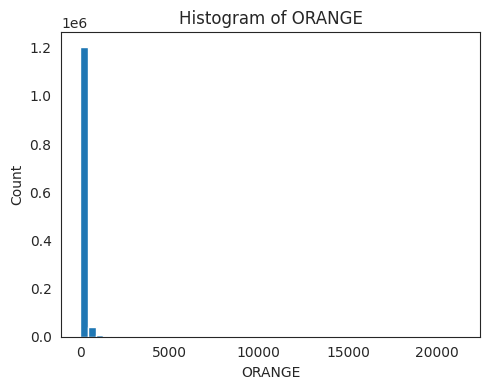

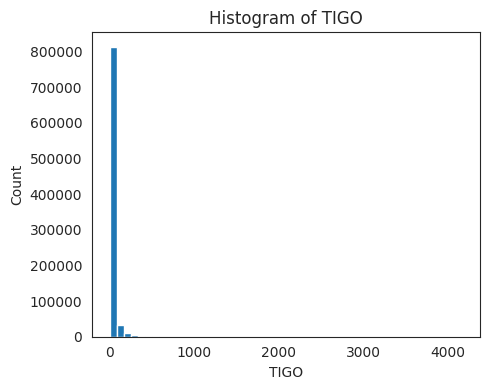

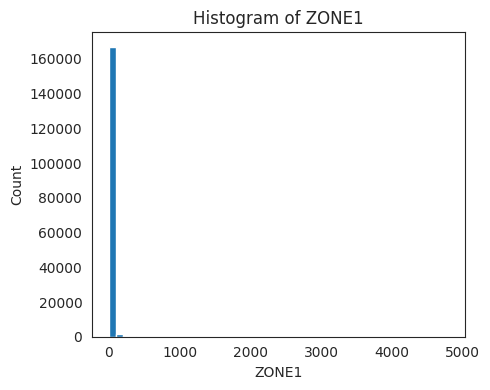

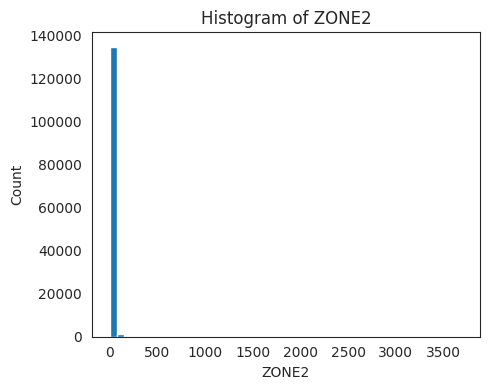

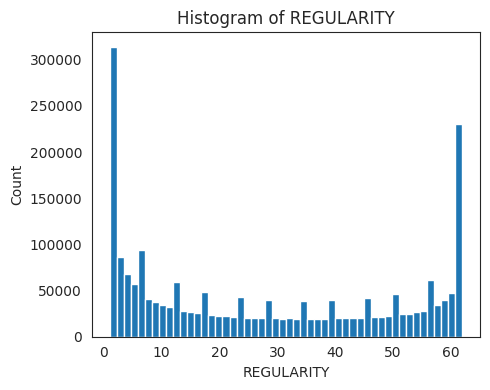

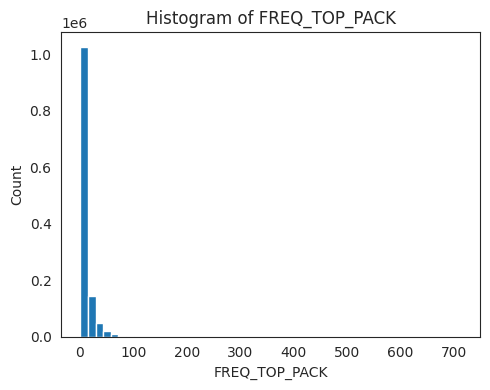

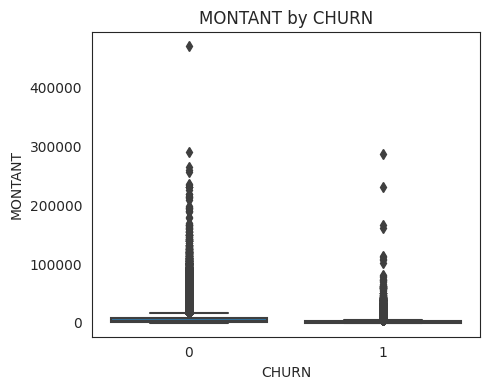

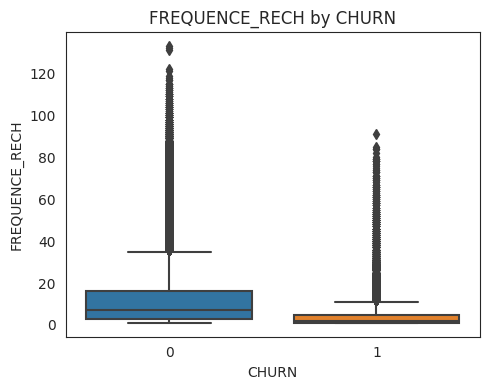

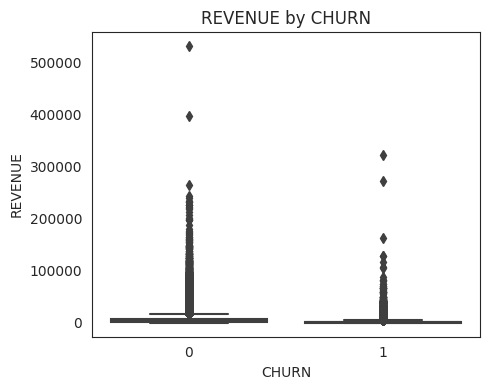

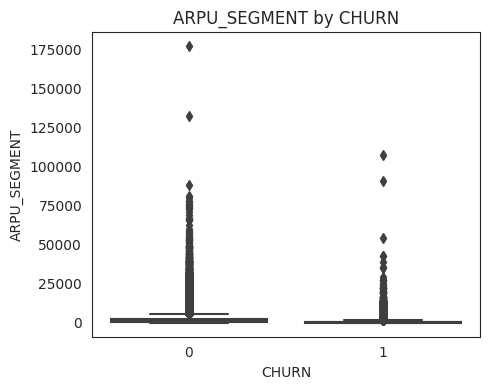

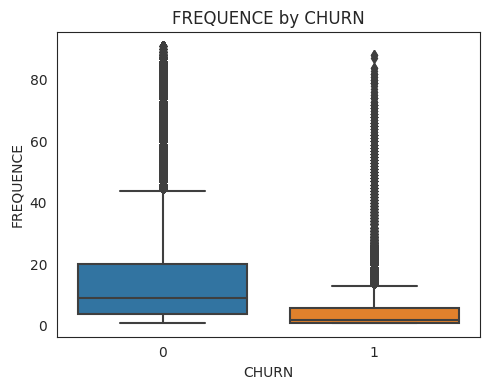

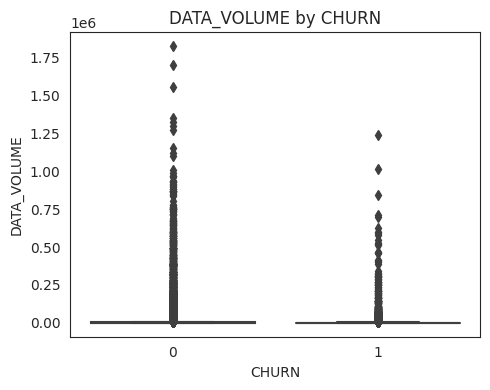

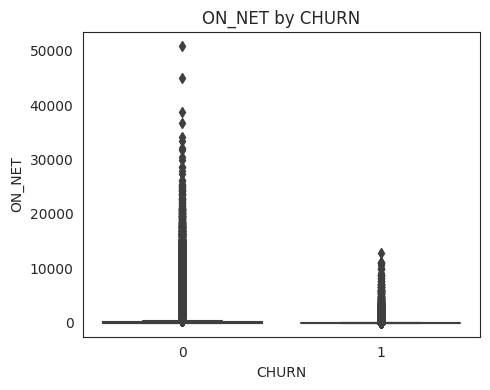

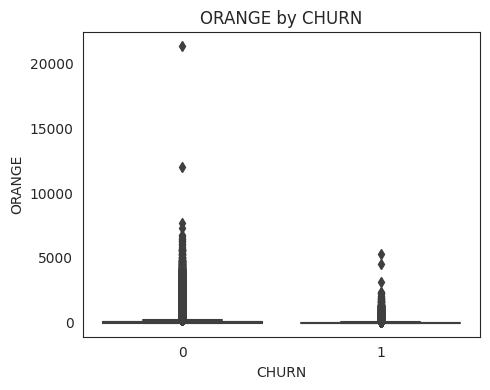

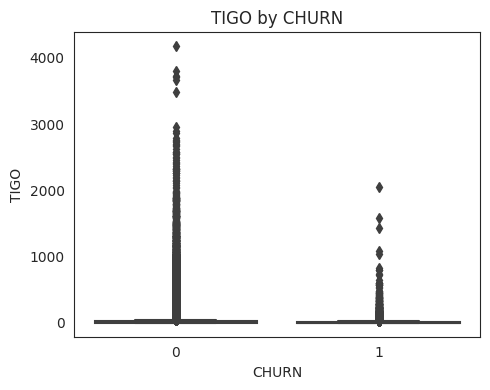

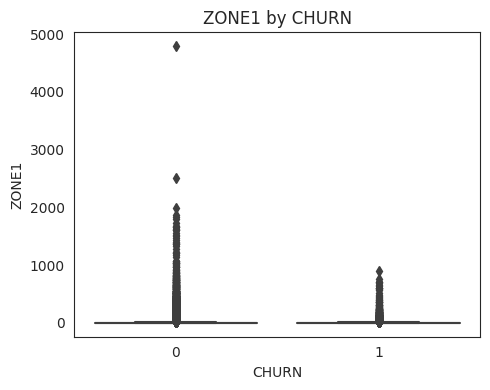

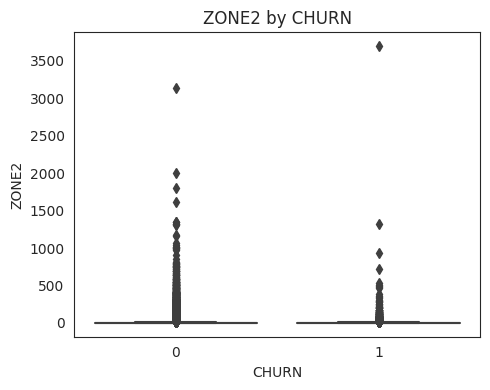

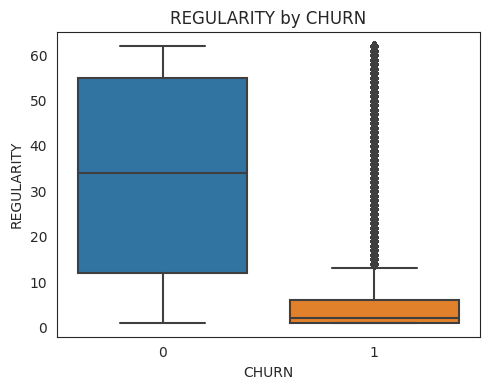

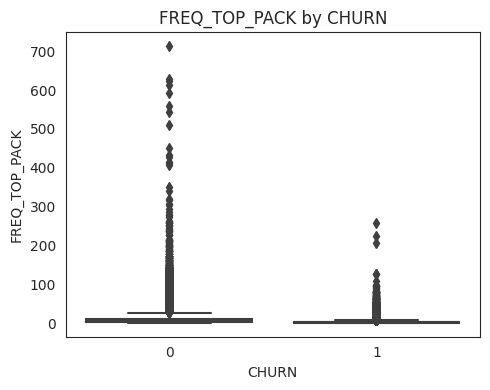

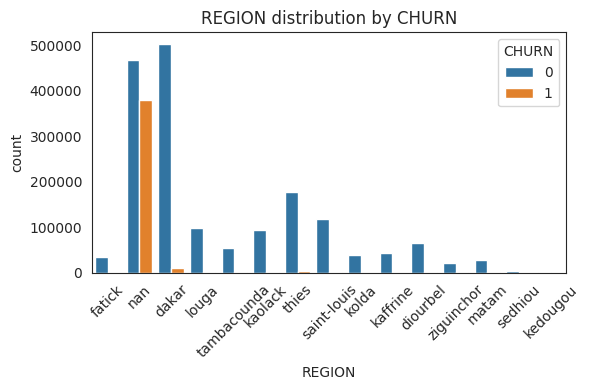

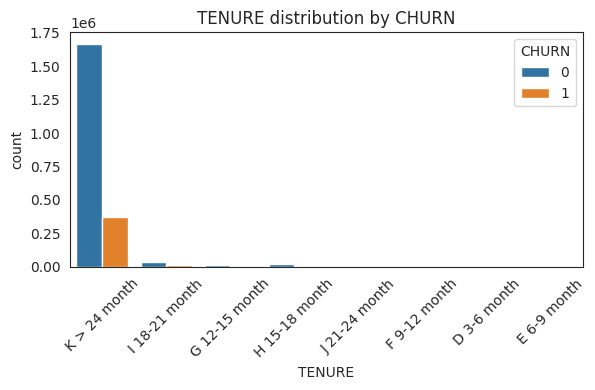

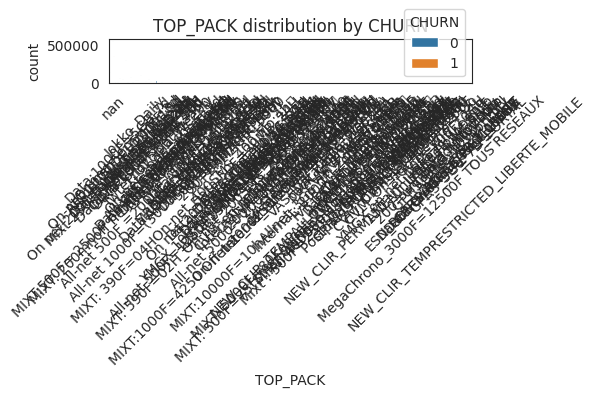

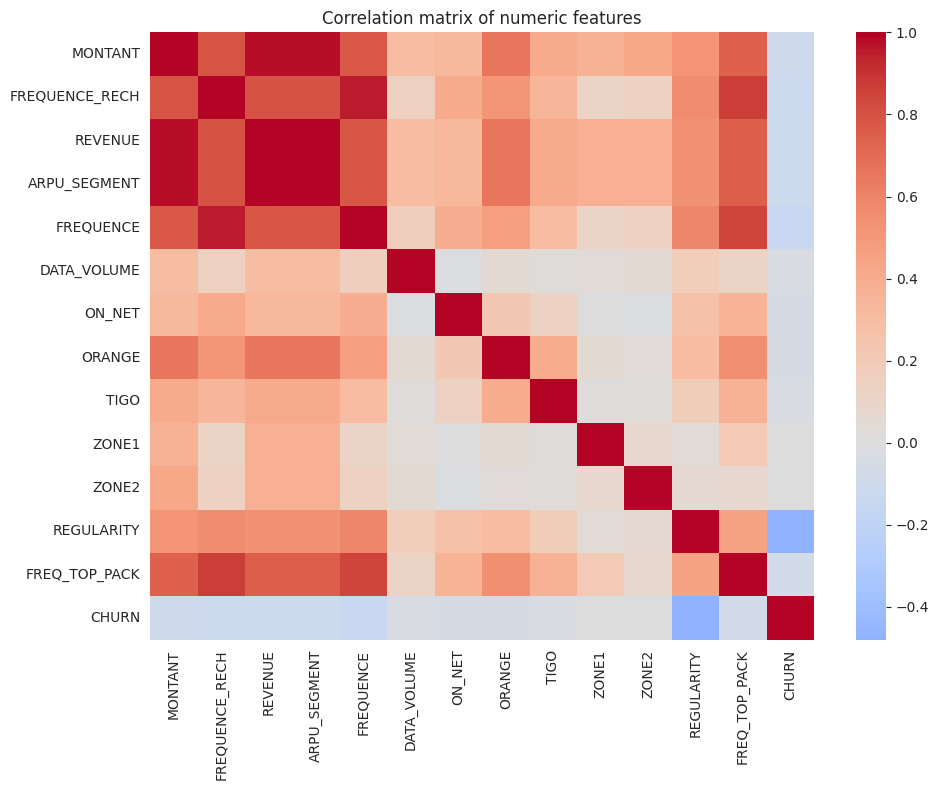

In [25]:
# 1. Histogram cho toàn bộ numeric
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 2. Boxplot numeric theo CHURN
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data=df, x="CHURN", y=col)
    plt.title(f"{col} by CHURN")
    plt.tight_layout()
    plt.show()

# 3. Countplot categorical theo CHURN
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="CHURN")
    plt.title(f"{col} distribution by CHURN")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols + ["CHURN"]].corr(), cmap="coolwarm", center=0)
plt.title("Correlation matrix of numeric features")
plt.tight_layout()
plt.show()